In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Perceptron:
    def __init__(self, epochs=50):
        self.epochs = epochs

    def fit(self, X, y):
        X_aug = np.hstack((np.ones((X.shape[0], 1)), X))

        np.random.seed(12)
        self.w = np.random.uniform(-1, 1, X_aug.shape[1])
        self.initial_w = self.w.copy()

        print("Initial weight vector w:", self.initial_w)
        print("\nTraining started -->")

        for epoch in range(self.epochs):
            for i in range(len(X_aug)):
                wx = np.dot(self.w, X_aug[i])

                # Misclassified point
                if y[i] * wx <= 0:
                    if y[i] == 1:      
                        self.w = self.w + X_aug[i]
                    else:              
                        self.w = self.w - X_aug[i]

        print("\nTraining completed")
        print("Final weight vector w:", self.w)

    def predict(self, X):
        X_aug = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.array([1 if np.dot(self.w, x) >= 0 else -1 for x in X_aug])

#### Note: Data point must be linearly separable in case of Single Perceptron

In [57]:
X = np.array([
    [2, 3],
    [4, 5],
    [5, 10],
    [1, 4],
    [3, 2],
    [6, 2],
    [7, 3],
    [8, 1],
    [2, 8],
    [3, 7],
    [5, 6],
    [6, 5],
    [3, 6],
    [5, 1],
    [4, 10],
    [3, 7],
    [6, 10]
])

y = np.array([-1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1])

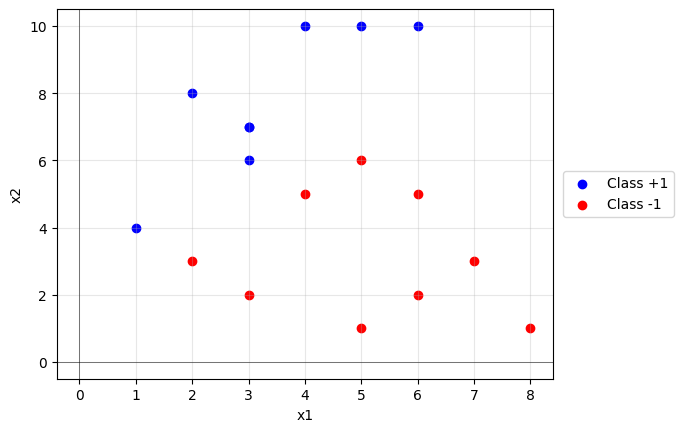

In [58]:
def plot_of_points(X, y):
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class +1')
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red', label='Class -1')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
    plt.axvline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
    
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(
        loc='center left',
        bbox_to_anchor=(1.02, 0.5),
        borderaxespad=0
    )
    plt.grid(True, alpha=0.3)
    plt.show()
plot_of_points(X, y)


Training with epochs = 1
Initial weight vector w: [0.1762616  0.79542746 0.78306146]

Training started -->

Training completed
Final weight vector w: [-1.8237384  -5.20457254  3.78306146]


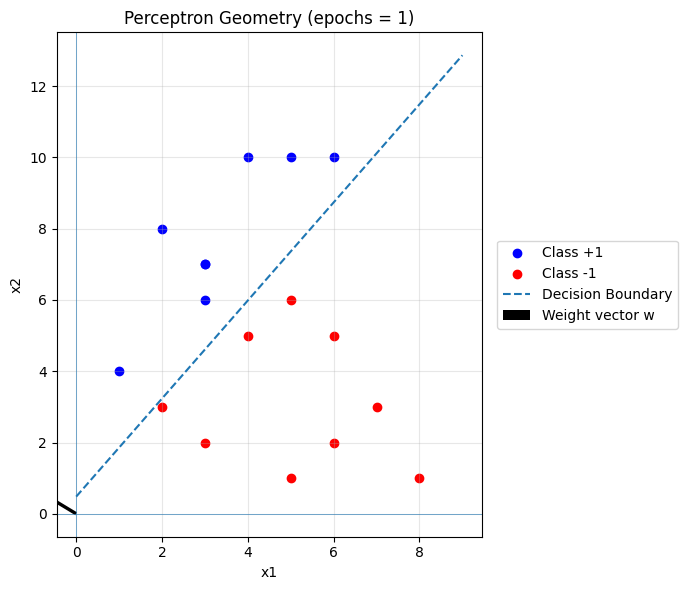


Training with epochs = 2
Initial weight vector w: [0.1762616  0.79542746 0.78306146]

Training started -->

Training completed
Final weight vector w: [-1.8237384  -5.20457254  3.78306146]


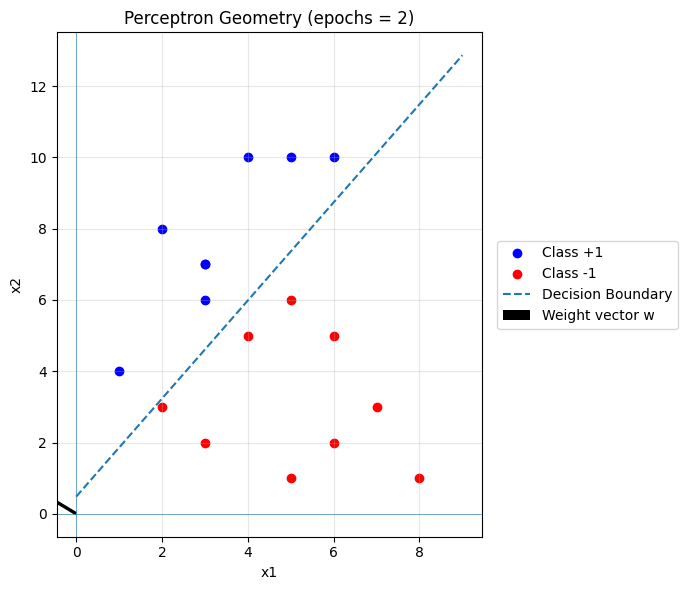


Training with epochs = 3
Initial weight vector w: [0.1762616  0.79542746 0.78306146]

Training started -->

Training completed
Final weight vector w: [-1.8237384  -5.20457254  3.78306146]


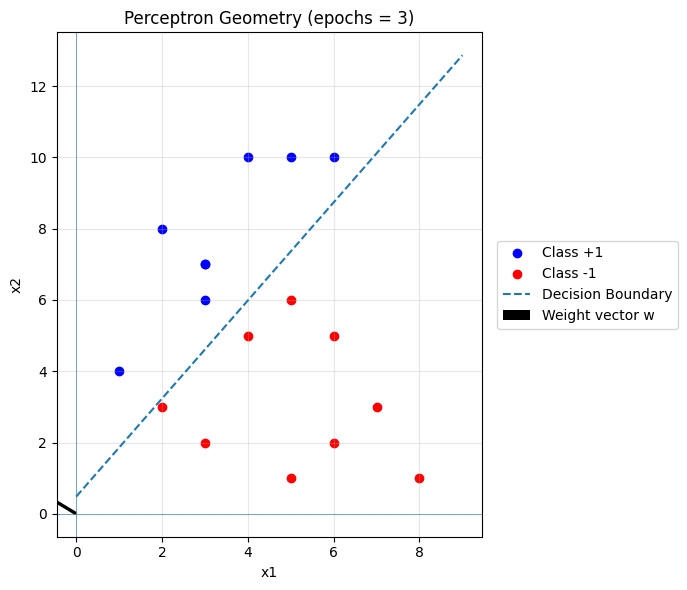


Training with epochs = 5
Initial weight vector w: [0.1762616  0.79542746 0.78306146]

Training started -->

Training completed
Final weight vector w: [-1.8237384  -5.20457254  3.78306146]


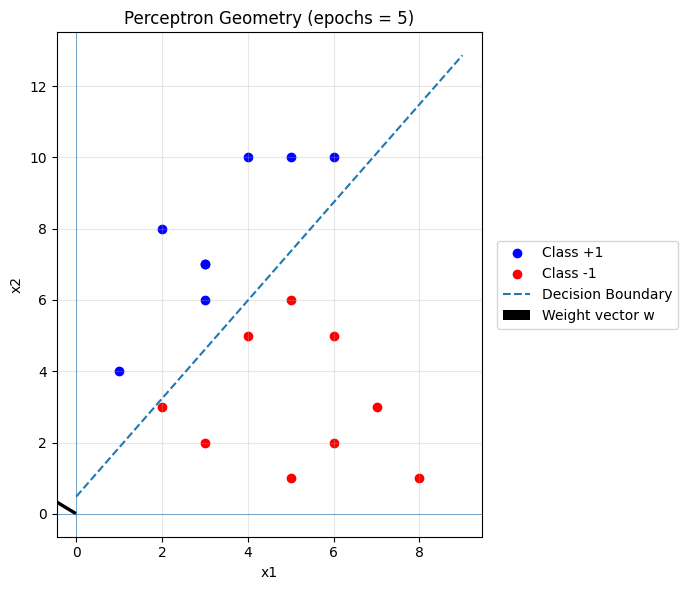


Training with epochs = 10
Initial weight vector w: [0.1762616  0.79542746 0.78306146]

Training started -->

Training completed
Final weight vector w: [-1.8237384  -5.20457254  3.78306146]


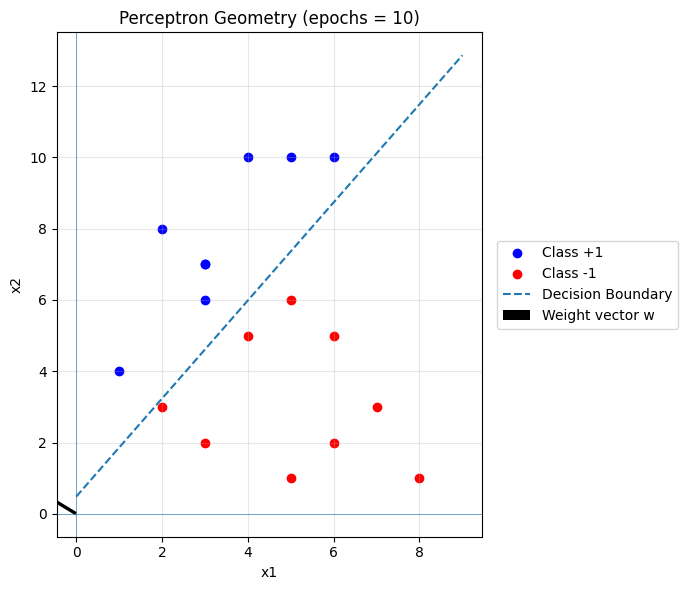

In [59]:
for k in [1, 2, 3, 5, 10]:
    print(f"\nTraining with epochs = {k}")
    
    model = Perceptron(epochs=k)
    model.fit(X, y)

    plt.figure(figsize=(7, 6))
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class +1')
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red', label='Class -1')

    # Decision Boundary: w0 + w1 x1 + w2 x2 = 0 
    w0, w1, w2 = model.w

    x1_vals = np.linspace(X[:, 0].min() - 1,
                           X[:, 0].max() + 1, 100)

    x2_vals = -(w0 + w1 * x1_vals) / w2
    plt.plot(x1_vals, x2_vals, linestyle="--",
             label="Decision Boundary")

    #  Weight vector (normal to boundary) 
    origin = np.array([0, 0])
    w_vec = np.array([w1, w2])

    plt.quiver(
        origin[0], origin[1],
        w_vec[0], w_vec[1],
        angles='xy', scale_units='xy',
        scale=1, width=0.008,
        label="Weight vector w"
    )

    # Axes through origin
    plt.axhline(0, linewidth=0.7, linestyle='-', alpha=0.6)
    plt.axvline(0, linewidth=0.7, linestyle='-', alpha=0.6)

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f"Perceptron Geometry (epochs = {k})")
    plt.legend(
        loc='center left',
        bbox_to_anchor=(1.02, 0.5)
    )
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [60]:
def perceptron(x, w, b):
    return 1 if np.dot(x, w) + b >= 0 else 0

In [61]:
def activation_step_function(weighted_sum):
    return 1 if weighted_sum >= 0 else 0

def compute_weighted_sum(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

def xor_using_perceptron_network(input_pair):
    # First layer: OR gate (at least one input must be 1)
    or_weights = [1, 1]
    or_bias = -0.5
    or_weighted_sum = compute_weighted_sum(input_pair, or_weights, or_bias)
    or_gate_output = activation_step_function(or_weighted_sum)
    
    # First layer: NAND gate (not both inputs are 1)
    nand_weights = [-1, -1]
    nand_bias = 1.5
    nand_weighted_sum = compute_weighted_sum(input_pair, nand_weights, nand_bias)
    nand_gate_output = activation_step_function(nand_weighted_sum)
    
    # Second layer: AND gate combining OR and NAND outputs
    # XOR = (A OR B) AND (NOT (A AND B))
    and_weights = [1, 1]
    and_bias = -1.5
    combined_inputs = [or_gate_output, nand_gate_output]
    and_weighted_sum = compute_weighted_sum(combined_inputs, and_weights, and_bias)
    xor_output = activation_step_function(and_weighted_sum)
    
    return xor_output

### Logic


#### XOR = (A OR B) AND (NOT (A AND B))

In [62]:
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

print("Input1 | Input2 | XOR Output")
for input_values in X_xor:
    input1, input2 = input_values[0], input_values[1]
    xor_result = xor_using_perceptron_network(input_values)
    print(f"   {input1}        {input2}        {xor_result}")

Input1 | Input2 | XOR Output
   0        0        0
   0        1        1
   1        0        1
   1        1        0


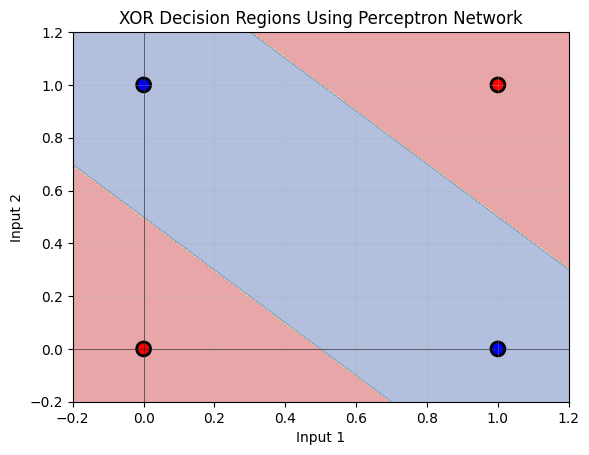

In [63]:
grid_resolution = 200
grid_range = (-0.2, 1.2)

x1_grid, x2_grid = np.meshgrid(
    np.linspace(grid_range[0], grid_range[1], grid_resolution),
    np.linspace(grid_range[0], grid_range[1], grid_resolution)
)

grid_predictions = np.array([
    xor_using_perceptron_network([x1, x2]) 
    for x1, x2 in zip(x1_grid.ravel(), x2_grid.ravel())
])
grid_predictions = grid_predictions.reshape(x1_grid.shape)

# Visualize decision regions
plt.contourf(x1_grid, x2_grid, grid_predictions, alpha=0.4, cmap='RdYlBu')

# Plot XOR truth table points
xor_inputs = [0, 0, 1, 1]
xor_outputs = [0, 1, 0, 1]
point_colors = ['red', 'blue', 'blue', 'red']

# Add axes through origin
plt.axhline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
plt.axvline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)

plt.scatter(xor_inputs, xor_outputs, 
           c=point_colors, s=100, edgecolors='black', linewidths=2)

plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("XOR Decision Regions Using Perceptron Network")
plt.grid(True, alpha=0.3)
plt.show()